# Räumliche Bewegung

## Inhalt
* [Ort und Zeit](#1)
    * [Ortskoordinaten als Funktionen der Zeit](#1.1)
    * [Der Ortsvektor](#1.2)
    * [Graphische Darstellung der Position](#1.3)
        * [Die Bahnkurve](#1.3.1)
        * [Achsenweise Zeit-Ort-Diagramme](#1.3.2)  
* [Geschwindigkeit](#2)  
    * [Der Geschwindigkeitsvektor](#2.1)
    * [Das Verhältnis von Ort und Geschwindigkeit](#2.2)
        * [Die mittlere Geschwindigkeit](#2.2.1)
        * [Die momentane Geschwindigkeit](#2.2.2)
    * [Graphische Darstellung der Geschwindigkeit](#2.3)
        * [Repräsentation des Geschwindigkeitsvektors](#2.3.1)
        * [Achsenweise Zeit-Geschwindigkeit-Diagramme](#2.3.2)
* [Beschleunigung](#3)  
    * [Der Beschleunigungsvektor](#3.1)
    * [Das Verhältnis von Geschwindigkeit und Beschleunigung](#3.2)
        * [Die mittlere Beschleunigung](#3.2.1)
        * [Die momentane Beschleunigung](#3.2.2)
    * [Graphische Darstellung der Beschleunigung](#3.3)
        * [Repräsentation des Beschleunigungsvektors](#3.3.1)
        * [Achsenweise Zeit-Beschleunigung-Diagramme](#3.3.2)
* [Zurückgelegter Weg und Wegkoordinate](#4)  
    * [Der zurückgelegte Weg als Funktion der Zeit](#4.1)
        * [Die Bahngeschwindigkeit](#4.1.1)
        * [Das Verhältnis von Bahngeschwindigkeit und zurückgelegtem Weg](#4.1.2)
        * [Das Verhältnis von Bahngeschwindigkeit und Bahnbeschleunigung](#4.1.3)
* [Zusammenfassende Graphen](#5)


Einleitend wird hier am Beispiel einer spiralförmigen Bewegung illustriert, wie die Kinematik die Bewegung eines Massenpunktes allgemein im dreidimensionalen Raum beschreibt. Sie müssen die mathematischen Details nicht verstehen. Das Ziel ist hier lediglich eine Intuition dafür zu erlangen, was dieses Denkgebäude ermöglicht, wie wir die Mathematik veranschaulichen können und was wir noch nicht verstehen.

Bevor wir beginnen, müssen wir jedoch einige nützliche Bibliotheken laden.

In [1]:
import numpy as np # efficient handling of arrays (special mathematical lists)
import pandas as pd # handling of lists (like "Microsoft Excel" - but more powerful)
import matplotlib.pyplot as plt # plotting graphs
from matplotlib.patches import Rectangle # plot rectangle
import matplotlib.animation as animation # animated plots
from IPython.display import HTML,display # display animations in video form

## Ort und Zeit<a class="anchor" id="1"></a>
In der Kinematik ist die Bewegung einer Punktmasse vollumfänglich beschrieben, wenn seine Position zu jedem Zeitpunkt bekannt ist. Die Position eines beliebigen Punktes wird beschrieben durch drei Ortskoordinaten. In diesem Falle wählen wir ein (herkömmliches) kartesisches Koordinatensystem mit den drei Ortskoordinaten $x$, $y$ und $z$.

### Ortskoordinaten als Funktionen der Zeit <a class="anchor" id="1.1"></a>
Um Bewegungen zu beschreiben, drücken wir die Zeitabhängigkeit der Ortskoordinaten des Massepunktes wie in der Mathematik durch [Funktionen](https://de.wikipedia.org/wiki/Funktion_(Mathematik)) aus. Für die spiralförmige Bewegung haben wir beispielsweise: 

<a class="anchor" id="one"></a>
\begin{equation}
\begin{matrix}
x(t)=cos(\omega t) \\
y(t)=sin(\omega t) \\
z(t)=k t \
\end{matrix}
\tag{1}
\end{equation}

, wo $\omega$ die sogenannte [*Winkelgeschwindigkeit*](https://de.wikipedia.org/wiki/Winkelgeschwindigkeit) des kreisförmigen Anteils der Bewegung und $k$ die Geschwindigkeit in $z$-Richtung ist. Die beiden Grössen $\omega$ und $k$ sind hier einfachheitshalber konstant. Sie kennen womöglich die [Sinus- und die Kosinusfunktion](https://de.wikipedia.org/wiki/Sinus_und_Kosinus) noch nicht. Was Sie an dieser Stelle verstehen sollten ist, dass es sich dabei um elementare mathematische Funktionen handelt, deren Funktionswert wir in unserem Fall in Abhängigkeit von (der unabhängigen Variable) $t$ ausrechnen können. Dies funktioniert analog dazu, wie Sie in der Mathematik den Funktionswert einer [linearen Funktion](https://de.wikipedia.org/wiki/Lineare_Funktion) $f(x)=m\cdot x+n;\quad m,n\in \mathbb {R}$ für jeden x-Wert ausrechnen können.

In [2]:
w = 20*1e-2*np.pi # Set angular velocity in x,y-plane
k = 10*1e-2 # Set velocity in z-direction

# Define the time dependence of the position coordinates as functions
f_x = lambda t: np.cos(w*t)
f_y = lambda t: np.sin(w*t)
f_z = lambda t: k*t

Ein Computer kann keine mathematischen Funktionen mit unendlich vielen Punkten zeichnen. Wir müssen vorher die Zeitabhängigkeit der Ortskoordinaten in Form einer (grossen, aber) endlichen Liste darstellen. Dafür müssen wir dem Computer ein Zeitintervall $[t_{min},t_{max}]$ angeben, indem wir diese Bewegung untersuchen möchten und ein $\Delta t_{i,i+1}$ zwischen zwei Zeitpunkten in der Liste.

In [3]:
# Set delta t, t_min and t_max
delta_t = 5*1e-2
t_min = 0
t_max = 20

t = np.arange(t_min,t_max,delta_t) # Generate list of time points

# Compute position coordinates for each time point
x = f_x(t)
y = f_y(t)
z = f_z(t)

# Convert to pandas format to conveniently display table
df_r = pd. DataFrame(np.array([t,x,y,z]).T,columns=["$t_i$","$x_i$","$y_i$","$z_i$"]) 
df_r.index.name = "Index $i$" # Set index column name
df_r

,$t_i$,$x_i$,$y_i$,$z_i$
Index $i$,,,,
0,0.00,1.000000,0.000000,0.000
1,0.05,0.999507,0.031411,0.005
2,0.10,0.998027,0.062791,0.010
3,0.15,0.995562,0.094108,0.015
4,0.20,0.992115,0.125333,0.020
...,...,...,...,...
395,19.75,0.987688,-0.156434,1.975
396,19.80,0.992115,-0.125333,1.980
397,19.85,0.995562,-0.094108,1.985


### Der Ortsvektor <a class="anchor" id="1.2"></a>

Um die Notation zu erleichtern, werden die Ortskoordinaten meist in einer mathematischen Konstruktion zusammengefasst; dem sogenannten *Ortsvektor*, abgekürzt $\vec{r}$. Wir schreiben:

<a class="anchor" id="two"></a>
\begin{equation}
\vec{r}=\begin{pmatrix}
x \\
y \\
z
\end{pmatrix}
\tag{2}
\end{equation}



Sie können sich darunter einen Pfeil vorstellen, der vom Ursprung des Koordinatensystems zum beschriebenen Punkt $P(x,y,z)$ zeigt. So gesehen hat der Ort eine Richtung und es handelt sich um eine gerichtete physikalische Grösse.

Die kartesischen Ortskoordinaten $x$,$y$ und $z$ sind jeweils die Längen des "Pfeil-Anteils" in die entsprechende Richtung des Koordinatensystems. Der *Betrag* des Ortsvektors, $|\vec{r}|$ oder $r$ ist Länge des Pfeils, d.h. der Abstand des Punktes $P(x,y,z)$ vom Ursprung des kartesischen Koordinatensystems. Da in diesem Koordinatensystem immer ein rechter Winkel zwischen jedem Achsenpaar liegt, kann mit zweimaliger Anwendung des Satzes von Pythagoras, $a^2+b^2=c^2$ dieser Abstand ausgerechnet werden.

<a class="anchor" id="three"></a>
\begin{equation}
|\vec{r}|=r=\sqrt{x^2+y^2+z^2}
\tag{3}
\end{equation}

Wenn der Punkt $P(x(t),y(t),z(t))$ sich bezüglich des Koordinatensystems bewegt, ändern sich im Allgemeinen auch Richtung und Länge des Vektors $\vec{r}(t)$. Der Vektor $\vec{r}(t)$ ist also wie die Ortskoordinaten $x(t)$,$y(t)$, und $z(t)$ abhängig von der Zeit $t$.

In [4]:
# Define the time dependence of the position vector as a function
f_r = lambda t: np.array([f_x(t),f_y(t),f_z(t)])

# Compute the position vector for each time point
r_vec = f_r(t)

### Graphische Darstellung der Position <a class="anchor" id="1.3"></a>

Mit einem statischen Graphen die Position eines Punktes über die Zeit darzustellen ist im allgemeinen, dreidimensionalen Fall nicht leicht. Dafür bräuchten wir idealerweise ein vierdimensionales Koordinatensystem, das aber leider - für uns im dreidimensionalen Raum lebende Wesen - nicht einfach vorstellbar ist. Um Abhilfe zu schaffen, wird die Veranschaulichung herkömmlicherweise auf mehrere Graphen aufgeteilt.

#### Die Bahnkurve <a class="anchor" id="1.3.1"></a>

Die *Bahnkurve* umfasst alle Punkte, die während der Bewegung besucht werden.

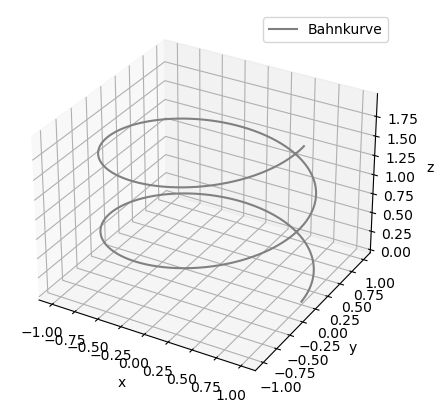

In [5]:
# plot trajectory
fig = plt.figure(figsize=(7.5,5))

ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=x,ys=y,zs=z,color="gray",label="Bahnkurve")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.legend()

plt.show()

Wann der beschriebene Massepunkt genau an einem bestimmten Ort ist, kann aus der Bahnkurve allein nicht abgelesen werden. Wenn wir einen beliebigen Zeitpunkt $t'$ wählen, können wir die Lage des Punktes zur Zeit $t'$ auf der Bahnkurve angeben - als Punkt oder mittels dem Ortsvektor $\vec{r}$.

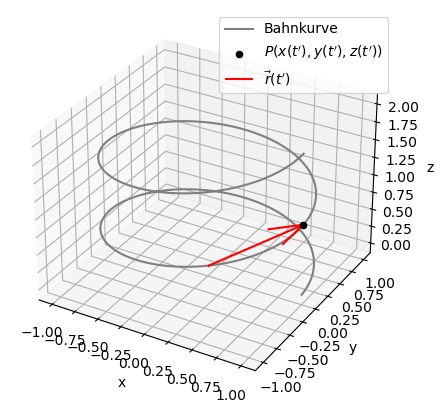

In [6]:
# Choose arbitrarily a current timepoint t_prime
t_prime = (t_min+t_max)//2

# plot trajectory
fig = plt.figure(figsize=(7.5,5))

ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=x,ys=y,zs=z,color="gray",label="Bahnkurve")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


# plot P(x(t'),y(t'),z(t'))
ax.scatter(f_x(t_prime),f_y(t_prime),f_z(t_prime),color="black",label="$P(x(t'),y(t'),z(t'))$")
# plot corresponding position vector
origin = [[0],[0],[0]] # Select origin of coordinate system as origin of vector
direction = f_r(t_prime) # Compute position vector at current t
ax.quiver(*origin,*direction,color=['r'],label=r"$\vec{r}(t')$")#


ax.legend()

plt.show()

#### Achsenweise Zeit-Ort-Diagramme <a class="anchor" id="1.3.2"></a>

Die Zeitabhängigkeit der Geschwindigkeit des Massepunktes kann explizit dargestellt werden, indem für jede Achse einzeln ein *Zeit-Ort-Diagramm* erstellt wird.

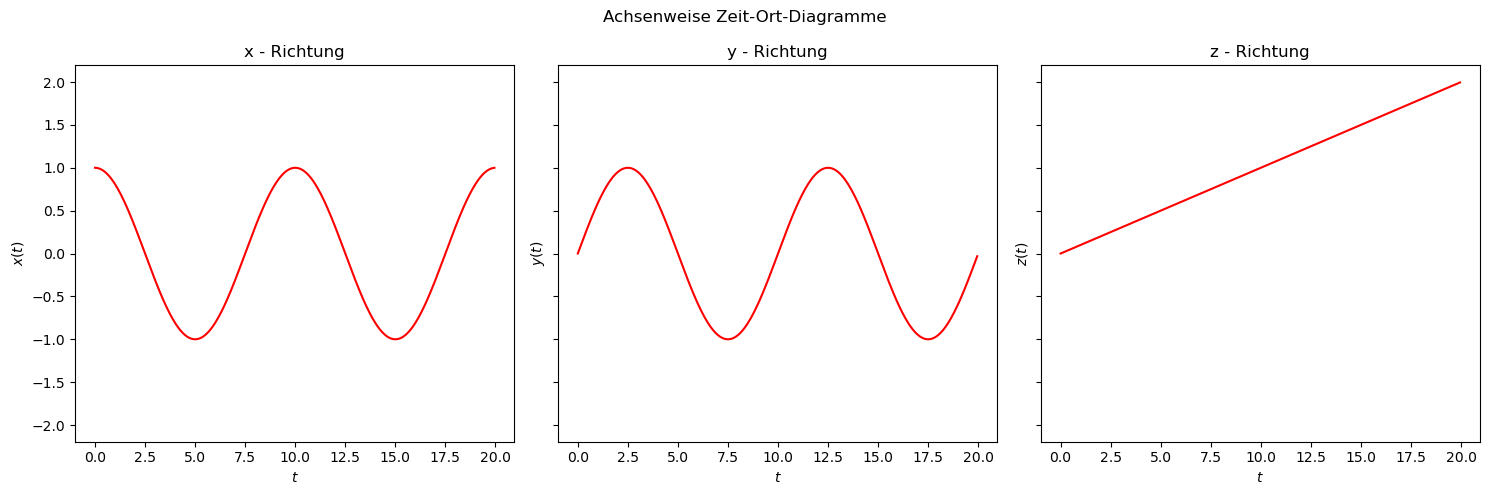

In [7]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharey=True)

# plot position coordinates
axis = ["x","y","z"]

for i,ax in enumerate(axes):
    ax.plot(t,r_vec[i],color="red")
    ax.set_xlabel("$t$")
    ax.set_ylabel("${} (t)$".format(axis[i]))
    ax.set_ylim(np.array([-1.1,1.1])*np.max(r_vec))
    ax.set_title(axis[i]+" - Richtung")

#plt.tight_layout()
plt.suptitle("Achsenweise Zeit-Ort-Diagramme")
plt.tight_layout()
plt.show()

## Geschwindigkeit <a class="anchor" id="2"></a>

Die Bewegung eines Massepunktes im Raum mag zwar vollumfänglich durch die zeitliche Entwicklung der Ortskoordinaten festgelegt sein. Doch eine intuitive Eigenschaft einer Bewegung ist für uns auch deren Geschwindigkeit $\vec{v}$.

### Der Geschwindigkeitsvektor <a class="anchor" id="2.1"></a>

Die Geschwindigkeit $\vec{v}$ hat wie schon der Ort $\vec{r}$ eine Richtung im Raum. Die Geschwindigkeit mitsamt ihrer Richtung ist gegeben durch die drei Geschwindigkeiten $v_x$, $v_y$ und $v_z$ entlang der jeweiligen Achsen. Als Geschwindigkeitsvektor ausgedrückt schreibt man:

<a class="anchor" id="four"></a>
\begin{equation}
\vec{v}=\begin{pmatrix}
v_x \\
v_y \\
v_z
\end{pmatrix}
\tag{4}
\end{equation}

Die Länge des Geschwindigkeitsvektors $\vec{v}$, sein Betrag $|\vec{v}|=v$ hat in der Physik eine spezielle Bedeutung. Es handelt sich um die *Bahngeschwindigkeit*, d.h. die Geschwindigkeit entlang der Bahnkurve. Dies wird auch als Schnelligkeit bezeichnet.

<a class="anchor" id="five"></a>
\begin{equation}
|\vec{v}|=v=\sqrt{v_x^2+v_y^2+v_z^2}
\tag{5}
\end{equation}


### Das Verhältnis von Ort und Geschwindigkeit <a class="anchor" id="2.2"></a>

Die Geschwindigkeiten $v_x$, $v_y$ und $v_z$ verändern sich in der Regel mit der Zeit. Die Funktionen $v_x(t)$, $v_y(t)$ und $v_z(t)$, welche diese Zeitabhängigkeiten beschreiben, können direkt aus den jeweiligen Funktionen für die Ortskoordinaten, $x(t)$,$y(t)$, und $z(t)$ abgeleitet werden. Wie man dies im allgemeinen Fall mathematisch korrekt macht, lernen Sie erst in der 5. Klasse des Gymnasiums im Mathematikunterricht. Hier ist es für uns deshalb nicht wichtig. In einfacheren Fällen wird dieser Prozess später veranschaulicht. Damit Sie trotzdem eine Vorstellung erhalten, folgt eine kurze Erklärung des Prinzips.

#### Die mittlere Geschwindigkeit <a class="anchor" id="2.2.1"></a>

Die *mittlere Geschwindigkeit* $\bar{v}_{\cdot}$ entlang der jeweiligen Koordinatenachsen ist gegeben durch die Gleichungen:

<a class="anchor" id="six"></a>
\begin{equation}
\bar{v}_{x}=\frac{\Delta s_{x}}{\Delta t}=\frac{\Delta x}{\Delta t},\qquad\bar{v}_{y}=\frac{\Delta s_{y}}{\Delta t}=\frac{\Delta y}{\Delta t},\qquad\bar{v}_{z}=\frac{\Delta s_{z}}{\Delta t}=\frac{\Delta z}{\Delta t}
\tag{6}
\end{equation}


Der Punkt in $\bar{v}_{\cdot}$ und in anderen Ausdrücken dient als Platzhalter für $x$,$y$, oder $z$. $\Delta x$, $\Delta y$ und $\Delta z$ sind die im Zeitintervall $[t,t+\Delta t]$ zurückgelegten Strecken *entlang der entsprechenden Achsen*:

<a class="anchor" id="seven"></a>
\begin{equation}
\Delta x=x(t+\Delta t)-x(t),\qquad\Delta y=y(t+\Delta t)-y(t),\qquad\Delta z=z(t+\Delta t)-z(t)
\tag{7}
\end{equation}

Graphisch entspricht $\bar{v}_{\cdot}$ der Steigung der Geraden durch die Punkte $(t|f(t))$ und $(t+\Delta t|f(t+\Delta t))$ im entsprechenden Zeit-*Ort*-Diagramm.

#### Die momentane Geschwindigkeit <a class="anchor" id="2.2.2"></a>

Uns interessiert allerdings was die *momentane Geschwindigkeit* $v_.(t)$ entlang einer Achse an einem einzigen Zeitpunkt $t$ ist und nicht mittlere Geschwindigkeit zwischen zwei Punkten $t$ und $t+\Delta t$. Mathematisch ausgedrückt lässt man hierfür $\Delta t$ gegen Null tendieren. Dies wird geschrieben als:

<a class="anchor" id="eight"></a>
\begin{equation}
v_{x}=lim_{\Delta t \rightarrow 0} \frac{\Delta x}{\Delta t}=\frac{dx}{dt}=\dot{x}, \qquad v_{y}=lim_{\Delta t \rightarrow 0} \frac{\Delta y}{\Delta t}=\frac{dy}{dt}=\dot{y}, \qquad v_{z}=lim_{\Delta t \rightarrow 0} \frac{\Delta z}{\Delta t}=\frac{dz}{dt}=\dot{z}
\tag{8}
\end{equation}

Graphisch ausgedrückt handelt es sich bei der Achsengeschwindigkeit $v_.(t)$ um die lokale Steigung im Zeit-Ort-Diagramm der entsprechenden Achse beim Punkt $(t|x(t))$. Anders ausgedrückt ist $v_.(t)$ die momentane Änderungsrate der entsprechenden Ortskoordinate zum Zeitpunkt $t$. (In der Mathematik nennt man dies die *Ableitung* der entsprechenden Ortskoordinate. Die Ableitung einer Funktion $f$ an der Stelle $x$ wird dort - anders als in der Physik - als $f'(x)$ geschrieben. Die Geschwindigkeiten würden als ${v}_{x}(t)=\dot{x}(t)=x'(t)$, ${v}_{y}(t)=\dot{y}(t)=y'(t)$ und ${v}_{z}(t)=\dot{z}(t)=z'(t)$ geschrieben.)


In Vektorform schreiben wir kurz und bündig:

<a class="anchor" id="nine"></a>
\begin{equation}\vec{v}=\begin{pmatrix}
v_x \\
v_y \\
v_z
\end{pmatrix}=\begin{pmatrix}
\dot{x} \\
\dot{y} \\
\dot{z}
\end{pmatrix}=\frac{d\vec{r}}{dt}=\dot{\vec{r}}
\tag{9}
\end{equation}

Nach welchen Regeln Funktionen abgeleitet werden, kann im Formelbuch nachgeschlagen werden und braucht Sie vorerst nicht zu kümmern. Voilà, das Resultat:

<a class="anchor" id="ten"></a>
\begin{equation}\begin{matrix}
x(t)=cos(\omega t)\\
y(t)=sin(\omega t)\\
z(t)=k t
\end{matrix}\quad \xrightarrow{\frac{d\cdot}{dt}}\begin{matrix}
\dot{x}(t)=v_x(t)=\omega \cdot sin(\omega t)\\
\dot{y}(t)=v_y(t)=- \omega \cdot cos(\omega t)\\
\dot{z}(t)=v_z(t)=k
\end{matrix}
\tag{10}
\end{equation}

Obschon Sie die Formeln für die Ableitungen in $x$- und $y$-Richtung noch nicht kennen, können Sie vielleicht später qualitativ im zusammenfassenden Graphen prüfen, ob $v_.(t)$ wirklich an jeder Stelle die lokale Steigung der entsprechenden Ortskoordinate ist. Die Ableitung in z-Richtung sollte für Sie verständlich sein. Die Steigung $m$ einer linearen Funktion $y(x)=m\cdot x$ ist konstant.

Lassen wir den Computer nun eine Liste generieren mit den Geschwindigkeiten entlang der Achsen für dieselben Zeitpunkte, welche für die Beschreibung Zeitabhängigkeit des Ortes verwendet wurden.

In [8]:
# Define the time dependence of the axial velocities as functions
f_vx = lambda t: -w*np.sin(w*t)
f_vy = lambda t: w*np.cos(w*t)
f_vz = lambda t: k*np.ones(len(t)) if hasattr(t, "__len__") else k

# Compute axial velocities for each time point
v_x = f_vx(t)
v_y = f_vy(t)
v_z = f_vz(t)

# Define the time dependence of the velocity vector as a function
f_v = lambda t: np.array([f_vx(t),f_vy(t),f_vz(t)])

# Compute the velocity vector for each time point
v_vec = f_v(t)

# Convert to pandas format to conveniently display table
df_v = pd. DataFrame(np.array([t,v_x,v_y,v_z]).T,columns=["$t_i$","$v_{x,i}$","$v_{y,i}$","$v_{z,i}$"]) 
df_v.index.name = "Index $i$" # Set index column name
df_v

,$t_i$,"$v_{x,i}$","$v_{y,i}$","$v_{z,i}$"
Index $i$,,,,
0,0.00,-0.000000,0.628319,0.1
1,0.05,-0.019736,0.628008,0.1
2,0.10,-0.039452,0.627079,0.1
3,0.15,-0.059130,0.625530,0.1
4,0.20,-0.078749,0.623364,0.1
...,...,...,...,...
395,19.75,0.098291,0.620583,0.1
396,19.80,0.078749,0.623364,0.1
397,19.85,0.059130,0.625530,0.1


### Graphische Darstellung der Geschwindigkeit <a class="anchor" id="2.3"></a>

Wir stellen vierdimensionale Daten zur Zeitabhängigkeit der Geschwindigkeit analog zum Falle der Zeitabhängigkeit des Ortes dar.

#### Repräsentation des Geschwindigkeitsvektors <a class="anchor" id="2.3.1"></a>

Als Ursprung des Geschwindigkeitsvektors - seinen Ankerpunkt - wählen wir üblicherweise die Position des Massepunktes. In diesem Fall liegt der Geschwindigkeitsvektor *tangential* zur Bahnkurve. Das heisst er zeigt in die Richtung, in welche sich der Massepunkt momentan bewegt und berührt die Bahnkurve generell nur and der Position der Punktmasse.

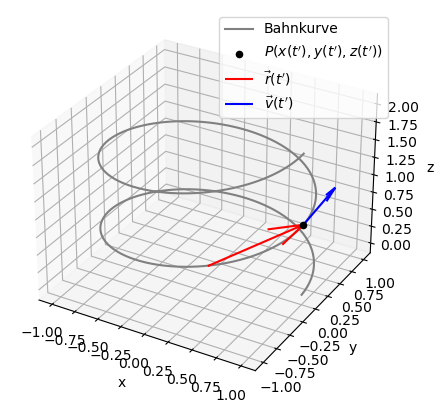

In [9]:
# plot trajectory
fig = plt.figure(figsize=(7.5,5))

ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=x,ys=y,zs=z,color="gray",label="Bahnkurve")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


# plot P(x(t'),y(t'),z(t'))
ax.scatter(f_x(t_prime),f_y(t_prime),f_z(t_prime),color="black",label="$P(x(t'),y(t'),z(t'))$")
# plot corresponding position vector
ax.quiver(*np.zeros(3),*f_r(t_prime),color=['r'],label=r"$\vec{r}(t')$")
# plot corresponding velocity vector
ax.quiver(*f_r(t_prime),*f_v(t_prime),color=['b'],label=r"$\vec{v}(t')$")

ax.legend()
plt.show()

#### Achsenweise Zeit-Geschwindigkeit-Diagramme <a class="anchor" id="2.3.2"></a>

Die Zeitabhängigkeit der Geschwindigkeit des Massepunktes kann explizit dargestellt werden, indem für jede Achse einzeln ein *Zeit*-*Geschwindigkeit-Diagramm* erstellt wird.

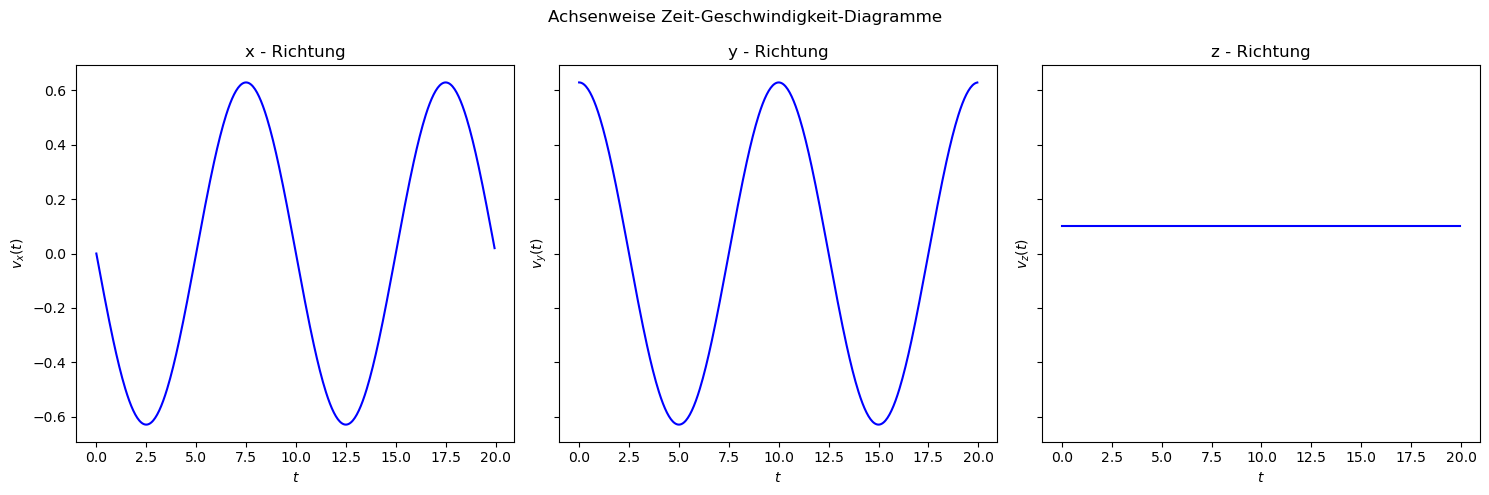

In [10]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharey=True)

# plot position coordinates
axis = ["x","y","z"]

for i,ax in enumerate(axes):
    ax.plot(t,v_vec[i],color="blue")
    ax.set_xlabel("$t$")
    ax.set_ylabel("$v_{} (t)$".format(axis[i]))
    ax.set_title(axis[i]+" - Richtung")

#plt.tight_layout()
plt.suptitle("Achsenweise Zeit-Geschwindigkeit-Diagramme")
plt.tight_layout()
plt.show()

## Beschleunigung <a class="anchor" id="3"></a>

In der Physik ist eine weitere kinematische Grösse von grosser Bedeutung, die *Beschleunigung* $\vec{a}$. (Der Pfeil drückt wiederum aus, dass es sich um eine gerichtete Grösse handelt, die wir im Allgemeinen üblicherweise als Vektor schreiben.) Die Beschleunigung gibt an, wie sich die Geschwindigkeit über die Zeit verändert. Galileo Galilei hat herausgefunden, dass sich Objekte "natürlicherweise" mit konstanter Geschwindigkeit $\vec{v}$ bewegen (zumindest in einem [Inertialsystem](https://de.wikipedia.org/wiki/Inertialsystem), das ist ein sogenannt unbeschleunigtes Bezugssystem). Wie Sie später lernen werden, führen wir dank Isaac Newton in der [Dynamik](https://de.wikipedia.org/wiki/Dynamik_(Physik)) jede Abweichung von dieser gradlinigen und gleichförmigen Bewegung auf die Wirkung einer Kraft zurück. Den Effekt von Kräften beschreiben wir entsprechend als Beschleunigung.


### Der Beschleunigungsvektor <a class="anchor" id="3.1"></a>

Die Beschleunigung im Raum ist gegeben durch die drei Beschleunigungen $a_x$, $a_y$ und $a_z$ entlang der jeweiligen Achsen. Als Geschwindigkeitsvektor ausgedrückt schreibt man:

<a class="anchor" id="eleven"></a>
\begin{equation}
\vec{a}=\begin{pmatrix}
a_x \\
a_y \\
a_z
\end{pmatrix}
\tag{11}
\end{equation}

Wie der Orts- und der Geschwindigkeitsvektor (und alle anderen Vektoren) hat der Beschleunigungsvektor $\vec{a}$ eine Länge, sein Betrag, $|\vec{a}|$.

<a class="anchor" id="twelve"></a>
\begin{equation}
|\vec{a}|=a=\sqrt{a_x^2+a_y^2+a_z^2}
\tag{12}
\end{equation}

### Das Verhältnis von Geschwindigkeit und Beschleunigung <a class="anchor" id="3.2"></a>

Das Verhältnis zwischen Geschwindigkeit und Beschleunigung ist analog zu jenem von Ort und Geschwindigkeit. Auch hier fehlt uns daher das mathematische Rüstzeug für ein umfassenderes Verständnis.

#### Die mittlere Beschleunigung <a class="anchor" id="3.2.1"></a>

Die *mittlere Beschleunigung* $\bar{a}_{\cdot}$ entlang der jewiligen Koordinatenachsen ist gegeben durch die Gleichungen:

<a class="anchor" id="thirteen"></a>
\begin{equation}
\bar{a}_{x}=\frac{\Delta v_x}{\Delta t},\qquad\bar{v}_{y}=\frac{\Delta a_y}{\Delta t},\qquad\bar{v}_{z}=\frac{\Delta a_z}{\Delta t}
\tag{13}
\end{equation}

$\Delta v_x$, $\Delta v_y$ und $\Delta v_z$ sind die Änderungen der jeweiligen Achsengeschwindigkeiten im Zeitintervall $[t,t+\Delta t]$ :

<a class="anchor" id="fourteen"></a>
\begin{equation}
\Delta v_x=v_x(t+\Delta t)-v_x(t),\qquad\Delta v_y=v_y(t+\Delta t)-v_y(t),\qquad\Delta v_z=v_z(t+\Delta t)-v_z(t)
\tag{14}
\end{equation}

Graphisch entspricht $\bar{a}_{\cdot}$ der Steigung der Geraden durch die Punkte $(t|f(t))$ und $(t+\Delta t|f(t+\Delta t))$ im entsprechenden Zeit-*Geschwindigkeit*-Diagramm.

#### Die momentane Beschleunigung <a class="anchor" id="3.2.2"></a>

Die *momentane Beschleunigung* $a_.(t)$ entlang einer Achse an einem einzigen Zeitpunkt $t$ erhält man als Grenzwert der mittleren Beschleunigung zwischen zwei Punkten $t$ und $t+\Delta t$, wenn man $\Delta t$ gegen Null tendieren lässt. Dies wird geschrieben als:

<a class="anchor" id="fifteen"></a>
\begin{equation}
a_{x}=lim_{\Delta t \rightarrow 0} \frac{\Delta v_x}{\Delta t}=\frac{dv_x}{dt}=\dot{v}_x, \qquad a_{y}=lim_{\Delta t \rightarrow 0} \frac{\Delta v_y}{\Delta t}=\frac{dv_y}{dt}=\dot{v}_y, \qquad a_{z}=lim_{\Delta t \rightarrow 0} \frac{\Delta v_z}{\Delta t}=\frac{dv_z}{dt}=\dot{v}_z
\tag{15}
\end{equation}

Graphisch ausgedrückt handelt es sich bei der Achsenbeschleunigung $a_.(t)$ um die lokale Steigung im *Zeit*-*Geschwindigkeit*-Diagramm der entsprechenden Achse beim Punkt $(t|x(t))$. Anders ausgedrückt ist $a_.(t)$ die momentane Änderungsrate der entsprechenden Achsengeschwindigkeit zum Zeitpunkt $t$. (In der Mathematik würde diese *Ableitung* wiederum nicht mit einem Punkt geschrieben: ${a}_{x}(t)=\dot{v}_x(t)=v_x'(t)$, ${a}_{y}(t)=\dot{v}_y(t)=v_y'(t)$ und ${a}_{z}(t)=\dot{v}_z(t)=v_z'(t)$)

In Vektorform schreiben wir kurz und bündig:

<a class="anchor" id="sixteen"></a>
\begin{equation}
\vec{a}=\begin{pmatrix}
a_x \\
a_y \\
a_z
\end{pmatrix}=\begin{pmatrix}
\dot{v_x} \\
\dot{v_y} \\
\dot{v_z}
\end{pmatrix}=\frac{d\vec{v}}{dt}=\dot{\vec{v}}=\ddot{\vec{r}}
\tag{16}
\end{equation}

Nach welchen Regeln Funktionen abgeleitet werden, kann im Formelbuch nachgeschlagen werden und braucht Sie vorerst nicht zu kümmern. Voilà, das Resultat:

<a class="anchor" id="seventeen"></a>
\begin{equation}
\begin{matrix}
x(t)=cos(\omega t)\\
y(t)=sin(\omega t)\\
z(t)=v_z t
\end{matrix}\quad \xrightarrow{\frac{d\cdot}{dt}}\begin{matrix}
\dot{x}(t)=v_x(t)=\omega \cdot sin(\omega t)\\
\dot{y}(t)=v_y(t)=- \omega \cdot cos(\omega t)\\
\dot{z}(t)=v_z(t)=v_z
\end{matrix}\quad \xrightarrow{\frac{d\cdot}{dt}}\begin{matrix}
\dot{v_x}(t)=a_x(t)=- \omega^2 \cdot cos(\omega t)\\
\dot{v_y}(t)=a_y(t)=- \omega^2 \cdot sin(\omega t)\\
\dot{v_z}(t)=a_z(t)=0
\end{matrix}
\tag{17}
\end{equation}

Wenn schon nicht quantitativ, können Sie später im zusammenfassenden Graphen prüfen qualitativ, ob $a_.(t)$ wirklich an jeder Stelle die lokale Steigung der entsprechenden Achsengeschwindigkeit ist. Die Ableitung in $z$-Richtung sollte für Sie verständlich sein. Die Steigung $m$ einer konstanten linearen Funktion $y(x)=m\cdot x=konst.$ ist Null.

Lassen wir den Computer nun eine Liste generieren mit den Geschwindigkeiten entlang der Achsen für dieselben Zeitpunkte, welche für die Beschreibung Zeitabhängigkeit des Ortes verwendet wurden.

In [11]:
# Define the time dependence of the axial accelerations as functions
f_ax = lambda t: -w**2*np.cos(w*t)
f_ay = lambda t: -w**2*np.sin(w*t)
f_az = lambda t: 0*t

# Compute axial accelerations for each time point
a_x = f_ax(t)
a_y = f_ay(t)
a_z = f_az(t)

# Define the time dependence of the acceleration vector as a function
f_a = lambda t: np.array([f_ax(t),f_ay(t),f_az(t)])

# Compute the acceleration vector for each time point
a_vec = f_a(t)

# Convert to pandas format to conveniently display table
df_a = pd. DataFrame(np.array([t,a_x,a_y,a_z]).T,columns=["$t_i$","$a_{x,i}$","$a_{y,i}$","$a_{z,i}$"]) 
df_a.index.name = "Index $i$" # Set index column name
df_a

,$t_i$,"$a_{x,i}$","$a_{y,i}$","$a_{z,i}$"
Index $i$,,,,
0,0.00,-0.394784,-0.000000,0.0
1,0.05,-0.394589,-0.012400,0.0
2,0.10,-0.394005,-0.024789,0.0
3,0.15,-0.393032,-0.037152,0.0
4,0.20,-0.391671,-0.049480,0.0
...,...,...,...,...
395,19.75,-0.389924,0.061758,0.0
396,19.80,-0.391671,0.049480,0.0
397,19.85,-0.393032,0.037152,0.0


### Graphische Darstellung der Beschleunigung <a class="anchor" id="3.3"></a>

Wieder müssen wir vierdimensionale Daten zur Zeitabhängigkeit der Beschleunigung auf verschiedenen statischen Graphen darstellen.

#### Repräsentation des Beschleunigungsvektors <a class="anchor" id="3.3.1"></a>

Als Ursprung des Geschwindigkeitsvektors - seinen Ankerpunkt - wählen wir üblicherweise die Spitze des Geschwindigkeitsvektors, wie wir ihn oben gezeichnet haben. So gibt der Beschleunigungsvektor visuell an, wie sich der Geschwindigkeitsvektor zum gegebenen Zeitpunkt ändert.

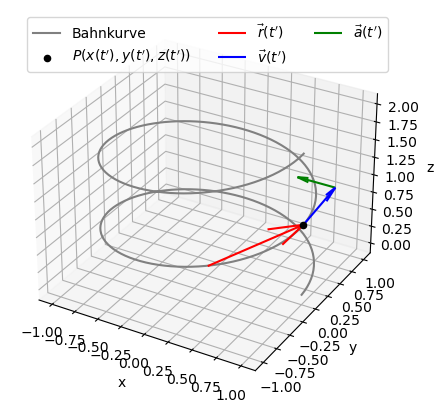

In [12]:
# plot trajectory
fig = plt.figure(figsize=(7.5,5))

ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=x,ys=y,zs=z,color="gray",label="Bahnkurve")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


# plot P(x(t'),y(t'),z(t'))
ax.scatter(f_x(t_prime),f_y(t_prime),f_z(t_prime),color="black",label="$P(x(t'),y(t'),z(t'))$")
# plot corresponding position vector
ax.quiver(*np.zeros(3),*f_r(t_prime),color=['r'],label=r"$\vec{r}(t')$")
# plot corresponding velocity vector
ax.quiver(*f_r(t_prime),*f_v(t_prime),color=['b'],label=r"$\vec{v}(t')$")
# plot corresponding acceleration vector
ax.quiver(*(f_r(t_prime)+f_v(t_prime)),*f_a(t_prime),color=['g'],label=r"$\vec{a}(t')$")

ax.legend(ncol=3)
plt.show()

#### Achsenweise Zeit-Beschleunigung-Diagramme <a class="anchor" id="3.3.2"></a>

Die Zeitabhängigkeit der Beschleunigung des Massepunktes kann explizit dargestellt werden, indem für jede Achse einzeln ein Zeit-Beschleunigung-Diagramm oder $a$-$t$-Diagramm erstellt wird.

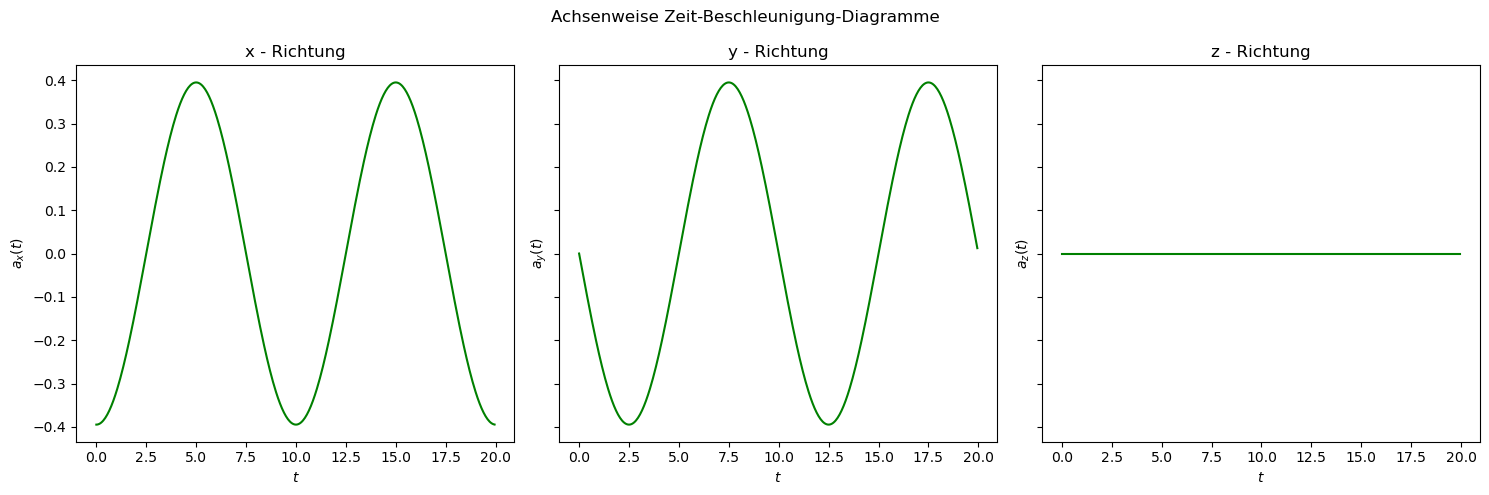

In [13]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharey=True)

# plot position coordinates
axis = ["x","y","z"]

for i,ax in enumerate(axes):
    ax.plot(t,a_vec[i],color="green")
    ax.set_xlabel("$t$")
    ax.set_ylabel("$a_{} (t)$".format(axis[i]))
    ax.set_title(axis[i]+" - Richtung")

#plt.tight_layout()
plt.suptitle("Achsenweise Zeit-Beschleunigung-Diagramme")
plt.tight_layout()
plt.show()

## Zurückgelegter Weg und Wegkoordinate <a class="anchor" id="4"></a>

Stellen Sie sich vor, sie folgten der Bahnkurve mit einer Schnur und würden diese im Anschluss spannen. Jede Position entlang der Bahnkurve hat eine eindeutige Entsprechung auf der Schnur - der zurückgelegte Weg auf der Bahnkurve. Die Position eines Objektes im Raum kann so durch eine einzige Wegkoordinate $s$, die Position auf der Schnur, repräsentiert werden. So können wir komplizierte dreidimensionale Bewegungen auf eine einzige Dimension hinunterbrechen. Einfachheitshalber platzieren wir den Anfang der gedachten Schnur dort, wo sich der Massepunkt zum Zeitpunkt $t=0$ befindet. So können wir die "Schnurlänge" $s(t)$ zum Zeitpunkt $t$ darstellen und $s(0)=0$. Wählen wir einen bestimmten Zeitpunkt $t'$, können wir diese Stecke auf der Bahnkurve angeben.

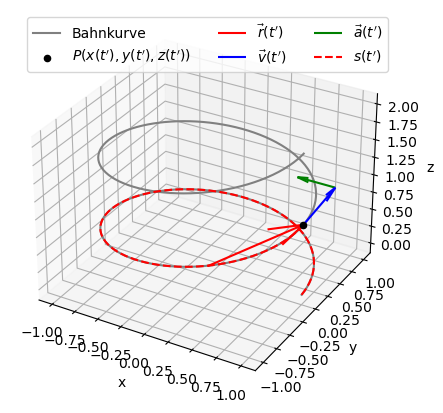

In [14]:
# plot trajectory
fig = plt.figure(figsize=(7.5,5))

ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=x,ys=y,zs=z,color="gray",label="Bahnkurve")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


# plot P(x(t'),y(t'),z(t'))
ax.scatter(f_x(t_prime),f_y(t_prime),f_z(t_prime),color="black",label="$P(x(t'),y(t'),z(t'))$")
# plot corresponding position vector
ax.quiver(*np.zeros(3),*f_r(t_prime),color=['r'],label=r"$\vec{r}(t')$")
# plot corresponding velocity vector
ax.quiver(*f_r(t_prime),*f_v(t_prime),color=['b'],label=r"$\vec{v}(t')$")
# plot corresponding acceleration vector
ax.quiver(*(f_r(t_prime)+f_v(t_prime)),*f_a(t_prime),color=['g'],label=r"$\vec{a}(t')$")

# plot s(t)
i_cur = np.argmin(abs(t-t_prime))
ax.plot(xs=x[:i_cur],ys=y[:i_cur],zs=z[:i_cur],color="red",label="$s(t')$",linestyle="dashed")

ax.legend(ncol=3)
plt.show()

### Der zurückgelegte Weg als Funktion der Zeit <a class="anchor" id="4.1"></a>

Aus den Funktionen $x(t)$,$y(t)$ und $z(t)$, welche die Zeitabhängigkeit der Ortsvariablen bestimmen, die Funktion $s(t)$ abzuleiten, ist - mathematisch gesehen - nicht leicht.

#### Die Bahngeschwindigkeit <a class="anchor" id="4.1.1"></a>

Weiter oben wurde erwähnt, dass die Geschwindigkeit der Punktmasse entlang der Bahnkurve, $v_s(t)$, der Länge des Geschwindigkeitsvektors, $|\vec{v}(t)|$, entspricht. Diese Länge möchten wir nun ausrechnen. Sie ist im gegebenen Fall (nicht ganz zufällig) konstant, das heisst nicht abhängig von der Zeit. Da Sie den Umgang mit Sinus und Kosinus noch nicht kennen, können Sie das folgende mathematische Argument wohl noch nicht ganz nachvollziehen. Das muss Sie nicht weiter stören.

*Wird der Satz des Pythagoras auf ein spezielles rechtwinkliges Dreieck angewandt, dessen längste Seite, die Hypotenuse, die Länge $1$ hat und ein anderer Winkel wessen den beliebigen Wert $x$ annimmt, findet man $sin^2(x)+cos^2(x)=1^2$. Rechnet die Länge mit den bereits bekannten Achsengeschwindigkeiten aus, ergibt sich:*

<a class="anchor" id="eighteen"></a>
\begin{equation}
|\vec{v}|=v=\sqrt{v_x^2+v_y^2+v_z^2}=\sqrt{(\omega sin(\omega t))^2+(-\omega cos(\omega t))^2+k^2}=\\ \sqrt{\omega^2( sin^2(\omega t)+cos^2(\omega t))+k^2} = \sqrt{\omega^2+k^2}
\tag{18}
\end{equation}

*Sowohl $\omega$ als auch $k$ sind Konstanten, also verändert sich $|v|=v$ selbst nicht mit der Zeit.*

Dies ist ein Beispiel für eine Bewegung mit einer konstanten Bahngeschwindigkeit $v$, aber einer zeitabhängigen Geschwindigkeit $\vec{v}(t)$. Die Länge des Geschwindigkeitsvektors bleibt zwar gleich, doch seine Richtung im Raum ändert sich fortwährend.

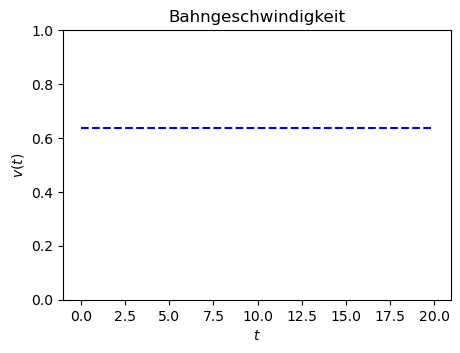

In [15]:
# define the time dependence of the speed as a function
v = np.sqrt(w**2+k**2)
f_vs = lambda t: v*np.ones(len(t)) if hasattr(t, "__len__") else v

# compute speed (along the trajectory) for each time point
v_s = f_vs(t)

# plot v-t-diagram
fig = plt.figure(figsize=(5,3.5))
plt.plot(t,v_s,color="blue",linestyle="dashed")
plt.xlabel("$t$")
plt.ylabel("$v(t)$")
plt.title("Bahngeschwindigkeit")
plt.ylim([np.floor(np.min(v_s)),np.ceil(np.max(v_s))])
plt.show()


#### Das Verhältnis von Bahngeschwindigkeit und zurückgelegtem Weg <a class="anchor" id="4.1.2"></a>

Anders als bei der Beschreibung der Bewegung entlang der Koordinatenachsen kennen wir im Falle der Wegkoordinate zuerst die Bahngeschwindigkeit und müssen daraus den bereits zurückgelegten Weg ableiten.

Die mittlere Geschwindigkeit entlang der Bahnkurve im Zeitintervall, $[t,t+\Delta t]$, ist:

<a class="anchor" id="nineteen"></a>
\begin{equation}
\bar{v}=\frac{\Delta {s}}{\Delta t}
\tag{19}
\end{equation}

Wie bei den Ortskoordinaten [(7)](#seven) berechnet sich der zurückgelegte Weg als:

<a class="anchor" id="twenty"></a>
\begin{equation}
\Delta {s}=s(t+\Delta t)-s(t)
\tag{20}
\end{equation}

Multiplizieren wir beide Seiten von [(19)](#nineteen) mit $\Delta t$, erhalten wir:

<a class="anchor" id="twentyone"></a>
\begin{equation}
\Delta {s}=\bar{v}\Delta t
\tag{21}
\end{equation}

Betrachten wir das Zeitintervall $[0,t]$ und nutzen [(20)](#twenty), vereinfacht sich die Formel [(21)](#twentyone) zu:

<a class="anchor" id="twentytwo"></a>
\begin{equation}
s(t)=\bar{v} t+s_0
\tag{22}
\end{equation}

, wobei $s_0$ der Startort ist.

Falls wir mit der mentalen Schnur dort ansetzten, wo sich der Massepunkt zum Zeitpunkt $t=0$ befindet, ist $s_0=0$ und wir erhalten schlicht:

<a class="anchor" id="twentythree"></a>
\begin{equation}
s(t)=\bar{v} t
\tag{23}
\end{equation}

Ist die Geschwindigkeit konstant, entspricht die mittlere Geschwindigkeit zwischen jedem Paar verschiedener Punkte der konstanten momentanen Geschwindigkeit. Die mittlere Geschwindigkeit selbst ist auch konstant. Dies trifft in unserem Fall zu und wir haben:

<a class="anchor" id="twentyfour"></a>
\begin{equation}
\bar{v}=\frac{\Delta {s}}{\Delta t}=v=|\vec{v}|=\sqrt{\omega^2+k^2}
\tag{24}
\end{equation}

Deshalb ist der zurückgelegte Weg in Abhängigkeit von der Zeit $t$ gegeben durch die lineare Gleichung:

<a class="anchor" id="twentyfive"></a>
\begin{equation}
s(t)=\sqrt{\omega^2+k^2} \cdot t
\tag{25}
\end{equation}



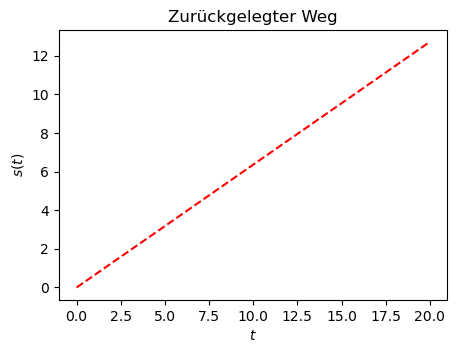

In [16]:
# define the time dependence of the distance travelled as a function
f_s = lambda t: v*t

# compute the distance travelled (along the trajectory) for each time point
s = f_s(t)

# plot v-t-diagram
fig = plt.figure(figsize=(5,3.5))
plt.plot(t,s,color="red",linestyle="dashed")
plt.xlabel("$t$")
plt.ylabel("$s(t)$")
plt.title("Zurückgelegter Weg")
plt.show()

Graphisch betrachtet handelt es sich beim zurückgelegten Weg zum Zeitpunkt $t'$ um die Fläche unter der Kurve im $v$-$t$-Diagramm zwischen dem Zeitpunkt im Zeitintervall $[0,t']$.

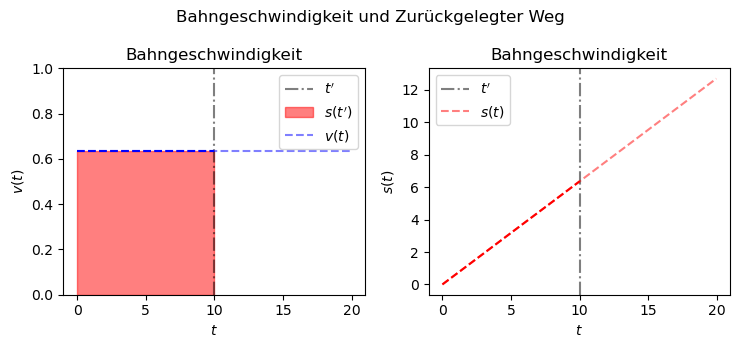

In [17]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(7.5,3.5))

# plot current time
axes[0].axvline(t_prime,color="black",linestyle="dashdot",alpha=0.5,label="$t'$")
# Create a rectangle patch and plot it
rect = Rectangle((0, 0), t_prime, np.sqrt(w**2+k**2), linewidth=1, edgecolor='red', facecolor='red',alpha=0.5,label="$s(t')$")
axes[0].add_patch(rect)
# plot v-t-diagram
axes[0].plot(t,v_s,color="blue",linestyle="dashed",alpha=0.5,label="$v(t)$")
axes[0].plot([0,t_prime],[v,v],color="blue",linestyle="dashed")

axes[0].legend()
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$v(t)$")
axes[0].set_title("Bahngeschwindigkeit")
axes[0].set_ylim([np.floor(np.min(v_s)),np.ceil(np.max(v_s))])

# plot s-t-diagram
axes[1].axvline(t_prime,color="black",linestyle="dashdot",alpha=0.5,label="$t'$")
axes[1].plot(t,s,color="red",linestyle="dashed",label="$s(t)$",alpha=0.5)
axes[1].plot([0,t_prime],[f_s(0),f_s(t_prime)],color="red",linestyle="dashed")
axes[1].set_xlabel("$t$")
axes[1].set_ylabel("$s(t)$")
axes[1].set_title("Bahngeschwindigkeit")
axes[1].legend()

#plt.tight_layout()
plt.suptitle("Bahngeschwindigkeit und Zurückgelegter Weg")
plt.tight_layout()
plt.show()

Im allgemeinen Fall drückt man die Fläche unter der Kurve mathematisch mit einem sogenannten Integral aus. 

<a class="anchor" id="twentysix"></a>
\begin{equation}
s(t')=\int_0^{t'} v(t)dt +s_0
\tag{26}
\end{equation}

Sie lernen in der 6. Klasse für einige Funktionen dieses Integral zu berechnen. Hier können wir die Fläche unter der Kurve nur so leicht ausrechnen, weil $v$ konstant ist. Bemerken Sie auch, dass $v(t)$ umgekehrt die momentane Steigung von $s(t)$ im $s$-$t$-Diagramm ist. Dies ist allgemeingültig und wir können dies schreiben wie in Gleichung [(8)](#eight):

<a class="anchor" id="twentyseven"></a>
\begin{equation}
v=lim_{\Delta t \rightarrow 0} \frac{\Delta s}{\Delta t}=\frac{ds}{dt}=\dot{s}
\tag{27}
\end{equation}

#### Das Verhältnis von Bahngeschwindigkeit und Bahnbeschleunigung <a class="anchor" id="4.1.3"></a>

Die mittlere Beschleunigung entlang der Bahnkurve ist in Analogie zur Gleichung [(13)](#thirteen):


<a class="anchor" id="twentyeight"></a>
\begin{equation}
\bar{a}=\frac{\Delta {v}}{\Delta t}
\tag{28}
\end{equation}

Entsprechend ist die momentane Beschleunigung entlang der Bahnkurve gegeben durch:

<a class="anchor" id="twentynine"></a>
\begin{equation}
a=lim_{\Delta t \rightarrow 0} \frac{\Delta v}{\Delta t}=\frac{dv}{dt}=\dot{v}=\ddot{s}
\tag{29}
\end{equation}

Die Steigung einer konstanten Funktion im $v$-$t$-Diagramm ist überall Null. Das heisst bei unserer spiralförmigen Bewegung ist die Beschleunigung entlang der Bahnkurve, $a$, zu jedem Zeitpunkt, $t$, Null.

<a class="anchor" id="thirty"></a>
\begin{equation}
a(t)=0
\tag{30}
\end{equation}

Die Beschleunigung im Raum $\vec{a}$ ist jedoch nicht Null.

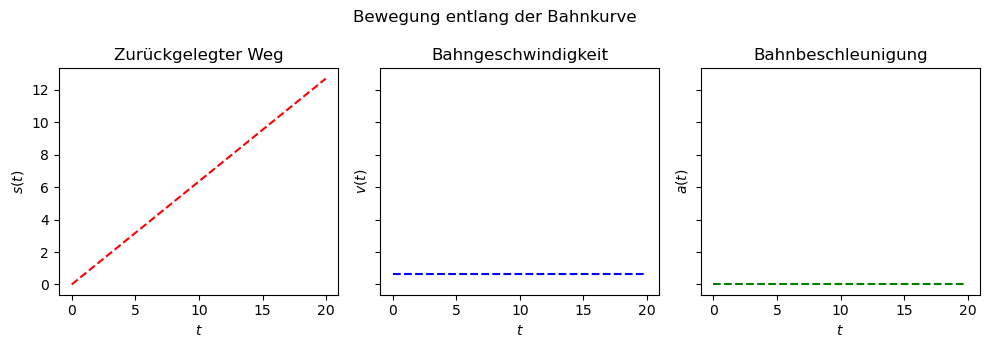

In [18]:
# define the time dependence of the distance travelled as a function
f_as = lambda t: 0*t

# compute the distance travelled (along the trajectory) for each time point
a_s = f_as(t)

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,3.5),sharey=True)

# plot s-t-diagram
axes[0].plot(t,s,color="red",linestyle="dashed")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$s(t)$")
axes[0].set_title("Zurückgelegter Weg")

# plot v-t-diagram
axes[1].plot(t,v_s,color="blue",linestyle="dashed",label="$v(t)$")
axes[1].set_xlabel("$t$")
axes[1].set_ylabel("$v(t)$")
axes[1].set_title("Bahngeschwindigkeit")

# plot a-t-diagram
axes[2].plot(t,a_s,color="green",linestyle="dashed",label="$v(t)$")
axes[2].set_xlabel("$t$")
axes[2].set_ylabel("$a(t)$")
axes[2].set_title("Bahnbeschleunigung")

#plt.tight_layout()
plt.suptitle("Bewegung entlang der Bahnkurve")
plt.tight_layout()
plt.show()

## Zusammenfassende Graphen <a class="anchor" id="5"></a>

Ich habe diese Inhalte für Sie in einem einzigen Graphen zusammengefasst. Versuchen Sie zu zweit die vorgestellten Elemente darin wiederzuerkennen.

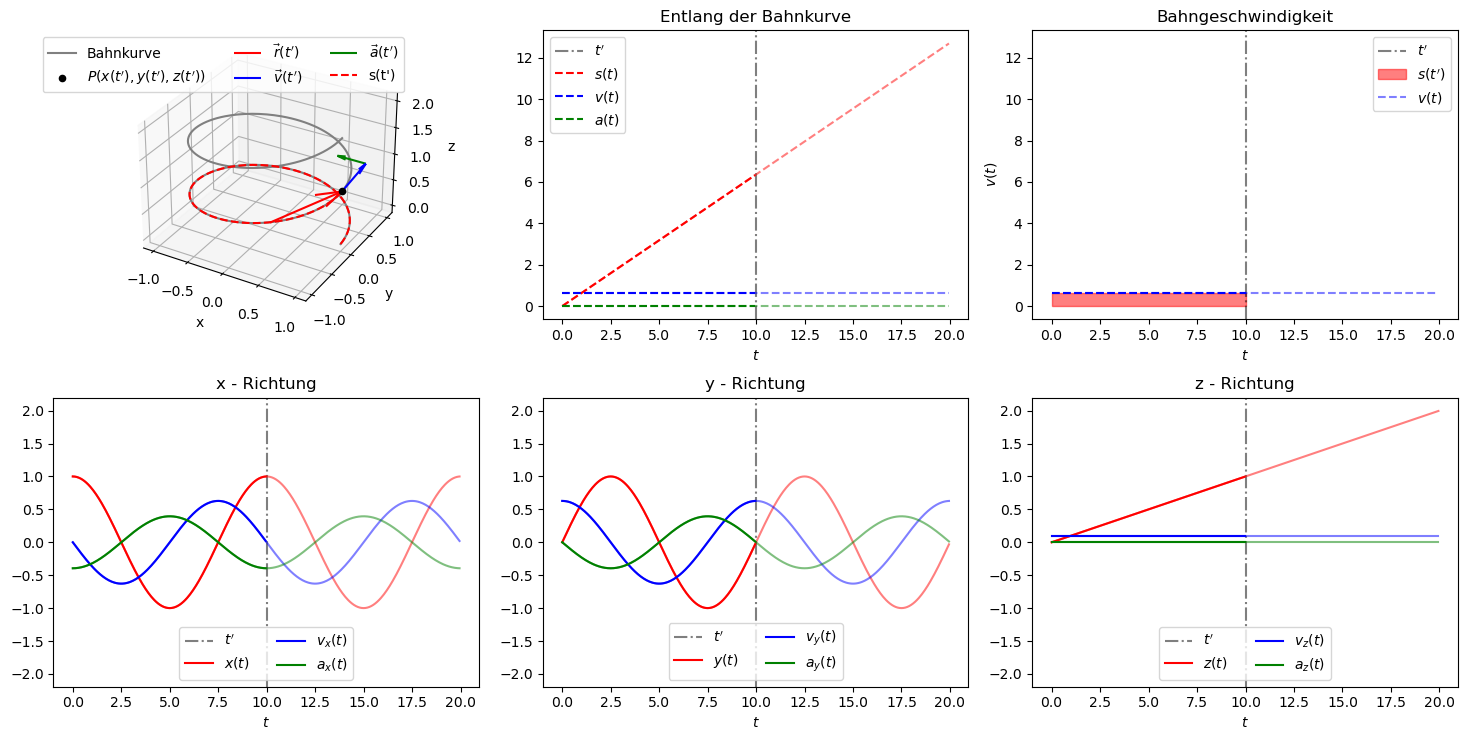

In [19]:
fig = plt.figure(figsize=(15,7.5))

# plot trajectory
axes_00 = fig.add_subplot(2,3,1, projection='3d')
axes_00.plot(xs=x,ys=y,zs=z,color="gray",label="Bahnkurve")

# plot P(x(t'),y(t'),z(t'))
axes_00.scatter(f_x(t_prime),f_y(t_prime),f_z(t_prime),color="black",label="$P(x(t'),y(t'),z(t'))$")
# plot corresponding position vector
axes_00.quiver(*np.zeros(3),*f_r(t_prime),color=['r'],label=r"$\vec{r}(t')$")
# plot corresponding velocity vector
axes_00.quiver(*f_r(t_prime),*f_v(t_prime),color=['b'],label=r"$\vec{v}(t')$")
# plot corresponding acceleration vector
axes_00.quiver(*(f_r(t_prime)+f_v(t_prime)),*f_a(t_prime),color=['g'],label=r"$\vec{a}(t')$")

# plot s(t)
i_cur = np.argmin(abs(t-t_prime))
axes_00.plot(xs=x[:i_cur],ys=y[:i_cur],zs=z[:i_cur],color="red",label="s(t')",linestyle="dashed")

axes_00.set_xlabel("x")
axes_00.set_ylabel("y")
axes_00.set_zlabel("z")

axes_00.legend(ncol=3)


# plot distance traveled
axes_01 = fig.add_subplot(2,3,2)
axes_01.axvline(t_prime,color="black",linestyle="dashdot",alpha=0.5,label="$t'$")
axes_01.plot(t,s,color="red",ls="dashed",alpha=0.5)
axes_01.plot(t[:i_cur],s[:i_cur],color="red",ls="dashed",label="$s (t)$")
axes_01.plot(t,v_s,color="blue",ls="dashed",alpha=0.5)
axes_01.plot(t[:i_cur],v_s[:i_cur],color="blue",ls="dashed",label="$v (t)$")
axes_01.plot(t,a_s,color="green",ls="dashed",alpha=0.5)
axes_01.plot(t[:i_cur],a_s[:i_cur],color="green",ls="dashed",label="$a (t)$")
axes_01.set_xlabel("$t$")
axes_01.set_title("Entlang der Bahnkurve")
axes_01.legend()

axes_02 = fig.add_subplot(2,3,3)
# plot current time
axes_02.axvline(t_prime,color="black",linestyle="dashdot",alpha=0.5,label="$t'$")
# Create a rectangle patch and plot it
rect = Rectangle((0, 0), t_prime, np.sqrt(w**2+k**2), linewidth=1, edgecolor='red', facecolor='red',alpha=0.5,label="$s(t')$")
axes_02.add_patch(rect)
# plot v-t-diagram
axes_02.plot(t,v_s,color="blue",linestyle="dashed",alpha=0.5,label="$v(t)$")
axes_02.plot([0,t_prime],[v,v],color="blue",linestyle="dashed")

axes_02.legend()
axes_02.set_xlabel("$t$")
axes_02.set_ylabel("$v(t)$")
axes_02.set_title("Bahngeschwindigkeit")
axes_02.set_ylim(axes_01.get_ylim())

# plot position coordinates
axis = ["x","y","z"]

for i,d in enumerate(r_vec):
    ax = fig.add_subplot(2,3,4+i)
    ax.axvline(t_prime,color="black",linestyle="dashdot",alpha=0.5,label="$t'$")
    ax.plot(t,d,color="red",alpha=0.5)
    ax.plot(t[:i_cur],d[:i_cur],color="red",label="${} (t)$".format(axis[i]))
    ax.plot(t,v_vec[i],color="blue",alpha=0.5)
    ax.plot(t[:i_cur],v_vec[i,:i_cur],color="blue",label="$v_{} (t)$".format(axis[i]))
    ax.plot(t,a_vec[i],color="green",alpha=0.5)
    ax.plot(t[:i_cur],a_vec[i,:i_cur],color="green",label="$a_{} (t)$".format(axis[i]))
    ax.set_xlabel("$t$")
    ax.set_title(axis[i]+" - Richtung")
    ax.set_ylim(np.array([-1.1,1.1])*np.max([r_vec,v_vec,a_vec]))
    ax.legend(loc="lower center",ncol=2)
    
plt.tight_layout()
plt.show()

Jupyter Notebooks haben den Vorteil, dass sich damit Graphen auch animieren lassen und sich die Zeitabhängigkeit des Ortes so natürlich darstellen lässt. Dafür müssen Sie jedoch einmalig die folgende Zelle ausführen, um eine weitere Bibliothek auf Ihrem Computer zu installieren. Danach können Sie die Zelle zu "Raw NBConvert" umstellen mit dem entsprechenden drop-down-Menü.

Hat es geklappt? Versuchen Sie die folgende Zelle auszuführen. Dies kann etwas dauern, da der grosse, animierte Graph in ein Video umgewandelt werden muss.

(Falls eine Fehlermeldung erscheint, müsste man dem Fehler in Ihrem individuellen Fall auf den Grund gehen. Solche Installationen aus einem Notebook heraus sind eine delikate Sache.)

In [20]:
fig = plt.figure(figsize=(15,7.5))

# plot trajectory
axes_00 = fig.add_subplot(2,3,1, projection='3d')
axes_00.plot(xs=x,ys=y,zs=z,color="gray",label="Bahnkurve")

# plot P(x(t'),y(t'),z(t'))
pt=axes_00.scatter(f_x(t_prime),f_y(t_prime),f_z(t_prime),color="black",label="$P(x(t'),y(t'),z(t'))$")
# plot corresponding position vector
rvec=axes_00.quiver(*np.zeros(3),*f_r(t_prime),color=['r'],label=r"$\vec{r}(t')$")
# plot corresponding velocity vector
vvec=axes_00.quiver(*f_r(t_prime),*f_v(t_prime),color=['b'],label=r"$\vec{v}(t')$")
# plot corresponding acceleration vector
avec=axes_00.quiver(*(f_r(t_prime)+f_v(t_prime)),*f_a(t_prime),color=['g'],label=r"$\vec{a}(t')$")

# plot s(t)
i_cur = 0
s_tprime=axes_00.plot(xs=x[:i_cur],ys=y[:i_cur],zs=z[:i_cur],color="red",label="s(t')",linestyle="dashed")[0]

axes_00.set_xlabel("x")
axes_00.set_ylabel("y")
axes_00.set_zlabel("z")

axes_00.legend(ncol=3)


# plot distance traveled
axes_01 = fig.add_subplot(2,3,2)
tprime_ = axes_01.axvline(t_prime,color="black",linestyle="dashdot",alpha=0.5,label="$t'$")
axes_01.plot(t,s,color="red",ls="dashed",alpha=0.5)
s_=axes_01.plot(t[:i_cur],s[:i_cur],color="red",ls="dashed",label="$s (t)$")[0]
axes_01.plot(t,v_s,color="blue",ls="dashed",alpha=0.5)
v_s_=axes_01.plot(t[:i_cur],v_s[:i_cur],color="blue",ls="dashed",label="$v (t)$")[0]
axes_01.plot(t,a_s,color="green",ls="dashed",alpha=0.5)
a_s_=axes_01.plot(t[:i_cur],a_s[:i_cur],color="green",ls="dashed",label="$a (t)$")[0]
axes_01.set_xlabel("$t$")
axes_01.set_title("Entlang der Bahnkurve")
axes_01.legend(loc="upper left")

axes_02 = fig.add_subplot(2,3,3)
# plot current time
tprime__ = axes_02.axvline(t_prime,color="black",linestyle="dashdot",alpha=0.5,label="$t'$")
# Create a rectangle patch and plot it
rect = Rectangle((0, 0), t_prime, np.sqrt(w**2+k**2), linewidth=1, edgecolor='red', facecolor='red',alpha=0.5,label="$s(t')$")
axes_02.add_patch(rect)
# plot v-t-diagram
axes_02.plot(t,v_s,color="blue",linestyle="dashed",alpha=0.5,label="$v(t)$")
v_=axes_02.plot([0,t_prime],[v,v],color="blue",linestyle="dashed")[0]

axes_02.legend(loc="upper left")
axes_02.set_xlabel("$t$")
axes_02.set_ylabel("$v(t)$")
axes_02.set_title("Bahngeschwindigkeit")
axes_02.set_ylim(axes_01.get_ylim())

# plot position coordinates
axis = ["x","y","z"]
axlines = []
ds_ = []
vs_ = []
as_ = [] 

for i,d in enumerate(r_vec):
    ax = fig.add_subplot(2,3,4+i)
    axlines.append(ax.axvline(t_prime,color="black",linestyle="dashdot",alpha=0.5,label="$t'$"))
    ax.plot(t,d,color="red",alpha=0.5)
    ds_.append(ax.plot(t[:i_cur],d[:i_cur],color="red",label="${} (t)$".format(axis[i]))[0])
    ax.plot(t,v_vec[i],color="blue",alpha=0.5)
    vs_.append(ax.plot(t[:i_cur],v_vec[i,:i_cur],color="blue",label="$v_{} (t)$".format(axis[i]))[0])
    ax.plot(t,a_vec[i],color="green",alpha=0.5)
    as_.append(ax.plot(t[:i_cur],a_vec[i,:i_cur],color="green",label="$a_{} (t)$".format(axis[i]))[0])
    ax.set_xlabel("$t$")
    ax.set_title(axis[i]+" - Richtung")
    ax.set_ylim(np.array([-1.1,1.1])*np.max([r_vec,v_vec,a_vec]))
    ax.legend(loc="lower center",ncol=2)
    
plt.tight_layout()

def animate(i):
    """Update the plot at the ith time step"""
    
    pt._offsets3d=([x[i]],[y[i]],[z[i]])
    
    global rvec
    rvec.remove()
    rvec = axes_00.quiver(*np.zeros(3),*f_r(t[i]),color=['r'],label=r"$\vec{r}(t')$")
    
    global vvec
    vvec.remove()
    vvec=axes_00.quiver(*f_r(t[i]),*f_v(t[i]),color=['b'],label=r"$\vec{v}(t')$")
    
    global avec
    avec.remove()
    avec=axes_00.quiver(*(f_r(t[i])+f_v(t[i])),*f_a(t[i]),color=['g'],label=r"$\vec{v}(t')$")
    
    s_tprime.set_xdata(x[:i])
    s_tprime.set_ydata(y[:i])
    s_tprime.set_3d_properties(z[:i])
    
    s_.set_data(t[:i],s[:i])
    v_s_.set_data(t[:i],v_s[:i])
    a_s_.set_data(t[:i],a_s[:i])
    
    rect.set_width(t[i])
    
    tprime_.set_data(t[i],[0,1])
    tprime__.set_data(t[i],[0,1])
    v_.set_data([0,t[i]],[v,v])
    
    for j,axline in enumerate(axlines):
        axline.set_data(t[i],[0,1])
        ds_[j].set_data(t[:i],r_vec[j,:i])
        vs_[j].set_data(t[:i],v_vec[j,:i])
        as_[j].set_data(t[:i],a_vec[j,:i]) 
    

anim = animation.FuncAnimation(fig, animate, frames=len(t))

# Create a video because the animation is otherwise too heavy
video = anim.to_html5_video()
html = HTML(video)
display(html)
plt.close() # avoid plotting a spare static plot